# Part I - (Dataset Exploration Ford GoBike System Data)
## by Valentine Munikah

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset has 16 columns and 183412 rows.
This presentation aims at looking at the main aspects of bike-sharing in the larger San Francisco Bay area. The major purpose here is to identify the key determinants of trip duration by examining the relationship between trip duration and other explanatory variables in the dataset. We attempt to answer the following questions.
How does journey duration fluctuate depending on user age, hour, day, and user type?
What does the journey duration distribution look like?
Which days are the busiest for trips?
Which times of day are the most popular for trips?





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> The dataset was provided by Udacity and I downloaded it manually


In [2]:
data=pd.read_csv('201902-fordgobike-tripdata.csv')
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Create a copy of the dataset
data_clean = data.copy()
data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#obtain the general information about the dataset
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
data_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#Number of rows and columns
data_clean.shape

(183412, 16)

In [7]:
#checking for missing values in the dataset
missing = data_clean.isnull().sum()
missing

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#checking for duplicates
data_clean.duplicated().sum()

0

In [9]:
#datatypes in the dataset
data_clean.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### What is the structure of your dataset?

> The Ford GoBike System Data has 16 columns and 112130 rows

### What is/are the main feature(s) of interest in your dataset?

> duration_minute

> duration_sec

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. member_birth_year
> 2. member_age
> 3. member_gender
> 4. bike_share_for_all_trip
> 5. start_month
> 6. start_dayofweek
> 7. user_type

Correcting Data Types


In [10]:
data_clean.start_station_id = data_clean.start_station_id.astype('str')
data_clean.end_station_id = data_clean.end_station_id.astype('str')
data_clean.bike_id = data_clean.bike_id.astype('str')
data_clean.start_time = data_clean.start_time.astype('datetime64')


### Cleaning the Data
> From the analysis done, we have seen that the dataset has muliple missing values and wrong data types for certain features in the dataset. 

In [11]:
#Handling Missing values.
# Percent of missing values in each column
(missing / data_clean.shape[0]) * 100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107408
start_station_name         0.107408
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107408
end_station_name           0.107408
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.506248
member_gender              4.506248
bike_share_for_all_trip    0.000000
dtype: float64

In [12]:
#we'll use a for loop to fill in missing values
for col in ["start_station_name", "end_station_name", "member_birth_year", "member_gender"]:
    data_clean[col] = data_clean[col].fillna(data_clean[col].mode()[0])

data_clean["member_gender"] = data_clean["member_gender"].fillna("Male")

In [13]:
#to check if our code worked, we will check for percentaes of missing values
(data_clean.isna().sum() / data_clean.shape[0]) * 100


duration_sec               0.0
start_time                 0.0
end_time                   0.0
start_station_id           0.0
start_station_name         0.0
start_station_latitude     0.0
start_station_longitude    0.0
end_station_id             0.0
end_station_name           0.0
end_station_latitude       0.0
end_station_longitude      0.0
bike_id                    0.0
user_type                  0.0
member_birth_year          0.0
member_gender              0.0
bike_share_for_all_trip    0.0
dtype: float64

In [14]:
#Time Conversion
data_clean['duration_minute'] = data_clean['duration_sec']/60
data_clean['start_date'] = data_clean.start_time.dt.strftime('%Y-%m-%d')
data_clean['start_hourofday'] = data_clean.start_time.dt.strftime('%H')
data_clean['start_dayofweek'] = data_clean.start_time.dt.strftime('%A')
data_clean['start_month'] = data_clean.start_time.dt.strftime('%B')
data_clean.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,start_date,start_hourofday,start_dayofweek,start_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,1988.0,Male,No,708.683333,2019-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,February


In [15]:
#Lets add an additional column that computes user age
data_clean['member_age'] = 2019 - data_clean['member_birth_year']
data_clean.head().T

,0,1,2,3,4
duration_sec,52185,42521,61854,36490,1585
start_time,2019-02-28 17:32:10.145000,2019-02-28 18:53:21.789000,2019-02-28 12:13:13.218000,2019-02-28 17:54:26.010000,2019-02-28 23:54:18.549000
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740
start_station_id,21.0,23.0,86.0,375.0,7.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza
start_station_latitude,37.7896,37.7915,37.7693,37.7748,37.8046
start_station_longitude,-122.401,-122.391,-122.427,-122.447,-122.272
end_station_id,13.0,81.0,3.0,70.0,222.0
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St
end_station_latitude,37.7942,37.7759,37.7864,37.7733,37.7927


In [27]:
#countplot
base_color = sb.color_palette()[0]
def plotcountplot(datasource, xvalue, plotcolor, x_label, y_label, plot_title):
    plt.figure(figsize = (8,4), dpi = 100)
    sb.countplot(data = datasource, x = xvalue, color = plotcolor)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)
    plt.xticks(rotation=45)
    plt.show()
    return

## Univariate Exploration


### Count of Bike Share

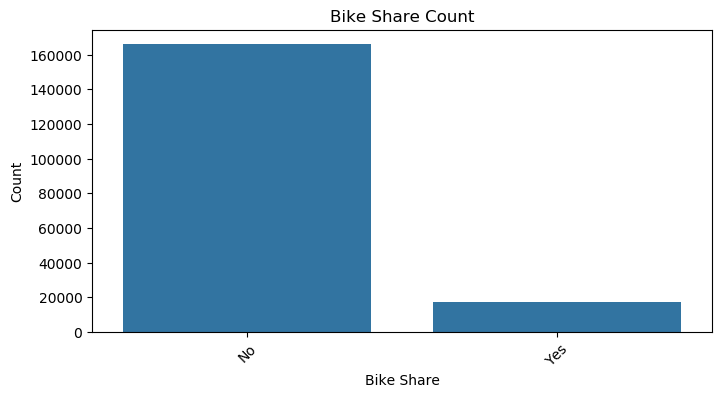

In [28]:
#for this visualization, we will call the plotcountplot function we defned above

plotcountplot(data_clean, 'bike_share_for_all_trip', base_color, 'Bike Share', 'Count', 'Bike Share Count' )


### Trip Distribution over the week

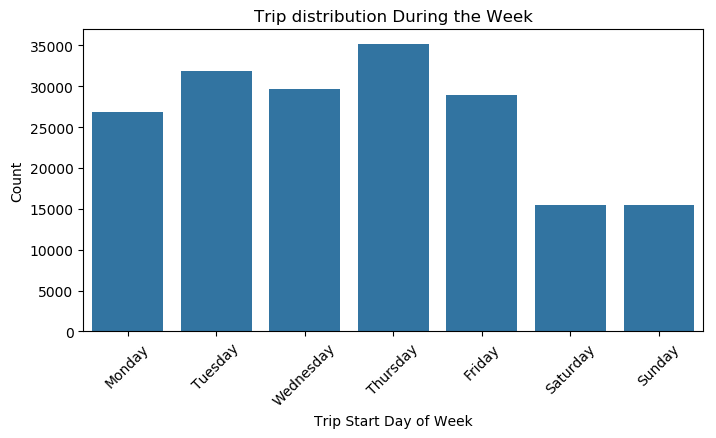

In [29]:
plt.figure(figsize = (8,4), dpi = 100)
#define the color of the plot


#define days of the week 
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_categ = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
data_clean['start_dayofweek'] = data_clean['start_dayofweek'].astype(weekday_categ)

#creating a countplot
plotcountplot(data_clean, 'start_dayofweek', base_color, 'Trip Start Day of Week', 'Count', 'Trip distribution During the Week' )


From the visualisation above, we can see that the number of trips increase gradually from Monday till Thursday when they reach their peak. A steady decline in number of trips is observed from Friday to Sunday.

### Trip Distribution By Duration in Minutes

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)
#define bin size
bins=np.arange(0,data_clean['duration_minute'].max()+0.5,0.5)

plt.hist(data = data_clean, x = "duration_minute",bins=bins)
plt.title("Trip Distribution by Duration(M)")
plt.xlabel('Duration (M)')
plt.ylabel('Number of Trips')
#add a vertical line across the x axis
plt.axvline(x = 30, color = "red")
plt.xlim(0, 60)
plt.show()

The histogram above we can see that the distribution of trips by minute duration is right skewed. 

### Trip Distribution by Age

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)
#defie base color for the histogram
base_color = sb.color_palette()[0]

#define bin size
bins = np.arange(0, data_clean['member_age'].max()+5, 5)
plt.hist(data = data_clean, x = 'member_age', color=base_color, bins = bins)
plt.xticks(rotation=90)
plt.xlabel('Member age')
plt.ylabel('Count')

plt.title("Trip Distribution by Age")

plt.show()

from the histogram distribution we can see that users aged 20-45 take up most rides. This can be attributed to the fact that this is an active population.

### Trip Distribution by Hour of Day

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)
# define hours
hour = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
hour_categ = pd.api.types.CategoricalDtype(ordered=True, categories=hour)
data_clean['start_hourofday'] = data_clean['start_hourofday'].astype(hour_categ)


sb.countplot(data = data_clean, x = "start_hourofday", color = base_color)
plt.title("Trip Distribution by Hour of Day")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

### Trip Distribution By Gender

In [ ]:

plt.figure(figsize = (8,4), dpi = 100)

counts = data_clean['member_gender'].value_counts(normalize = True)
sb.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('User Gender')
plt.ylabel('Count')
print(counts * 100)
plt.title("Distribution of Customers by gender")

plt.show()

A big percentage of users are male.

### Distribution By User Type

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

counts = data_clean['user_type'].value_counts(normalize = True)
sb.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('User Type')
plt.ylabel('Count')
print(counts * 100)

plt.title("Distribution of Customers by type ")
plt.show()

In [ ]:
# ignore warnings
import warnings
warnings.simplefilter("ignore")

df1 = data_clean[data_clean["duration_minute"] <= 60]
df2 = df1[data_clean["member_age"] <= 80]

df2.head()

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)
#define months
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_categ = pd.api.types.CategoricalDtype(ordered=True, categories=month)
data_clean['start_month'] = data_clean['start_month'].astype(month_categ)

sb.countplot(data = data_clean, x='start_month', color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Trip Start Month')
plt.ylabel('Count')

plt.title("Trip distribution per month")

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribtution of interest were gender, days of the week, trip duration in minutes and distribution by hour of day.
> I had to transform the duration of trips into minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Distribution of trips by minute was unusual. A big portion of the distribution was 30 less than 30 minutes. I removed outliers in the data.

> I created new features from the time feature

## Bivariate Exploration

###  Ride Distribution Based on User Type and Gender

In [ ]:
plt.figure(figsize=[12,7])
ax=sb.countplot(data = df2, x ='user_type',hue='member_gender')
plt.xlabel('User type',fontsize=15)
plt.ylabel('Number of rides',fontsize=15)
plt.title('Number of Rides Per Gender',fontsize=20)
plt.legend(fontsize=12)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.07, p.get_height()+50));

### Trip Distribution By User Type Duration

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "user_type", y = "duration_minute")
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute')

plt.title("Distribution of trip duration by user type")

plt.show()

From the boxplot above, we can see that subscribers usually have short trip durations while customers often have longer duration trips.

### Trip Duration During The Days of The Week

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data = df2, x = "start_dayofweek", y = "duration_minute", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

plt.show()

The boxplot shows that there is a steady increase of the duration of bike trips from Monday to Sunday. Monday recording the shortest trip duration while Sunday records the highest trip duration.

### Trip Distribution over Hours of Day by User Type

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sb.countplot(data = df2, x = "start_hourofday", hue='user_type')
plt.title("trip distribution over day hours - by user type")
plt.xlabel('Day hours')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Age distribution by User Type

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

sb.boxplot(data=df2, x = "user_type", y='member_age')
plt.xticks(rotation=90)
plt.xlabel('Member age')
plt.ylabel('Count')

plt.title("Distribution of Age by user type")

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration of bike rides is determined by time of day and user types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> An interesting relationship is that subscribers have more bike trips than customers between 0700 hours and 1800hours

## Multivariate Exploration


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sb.countplot(data = df2, x = df2['member_age'], hue='member_gender')
plt.title('Most Common Age For Having Bike Trips', fontsize=20)
plt.ylabel('Bike Trips', fontsize=14)
plt.xlabel('Age', fontsize=14);
plt.xticks(rotation=90);

The analysis for user age and gender that like having bike rides. From the count plot above, we can deduce that females between 25 and 38 like having bike rides. 

In [ ]:
#define bin size for the x axis
bin_x=np.arange(0,100,10)
#define bin size for the y axis
bin_y=np.arange(0,100,10)
plt.figure(figsize=[15,8])
plt.hist2d(data = df2, x = 'member_age',y = 'duration_minute',cmin=50,cmap='viridis_r',bins=[bin_x,bin_y])
plt.colorbar()
plt.xlabel('Member age',fontsize=15)
plt.ylabel('Trip duration (minutes)',fontsize=15)
plt.title('Trip duration vs members age',fontsize=15);

From the visualization above, we can see that users between the age of 20 and 40 have trips whose duration is below 20 minutes

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From this investigation it is clear that users between 20 to 40 years have the highest number of bike rides. However the duration of their trips is less than 20 minutes

### Were there any interesting or surprising interactions between features?

> From the analysis made, there is an intersetin relationshiip between age and gender of the users.

## Conclusions
> This analysis wasdone on a bike sharing system data that was provided by Udacity. The first step was to upload the dataset into the workspace. I went and did data cleaning on the dataset. from the explortory data analysis I did, we can see that bikes with higher id have more bike rides, this is an indication that users prefer modern bikes during their rides. 
It can also be observed that there are more male users as compred to female users. One interesting fact is that despite having more male users, female users between 25 and 35 years take up a moajority of the rides.
Despite doing data cleanup in the initial steps of the analysis, more data cleaning had to be done to clean out outliers.
